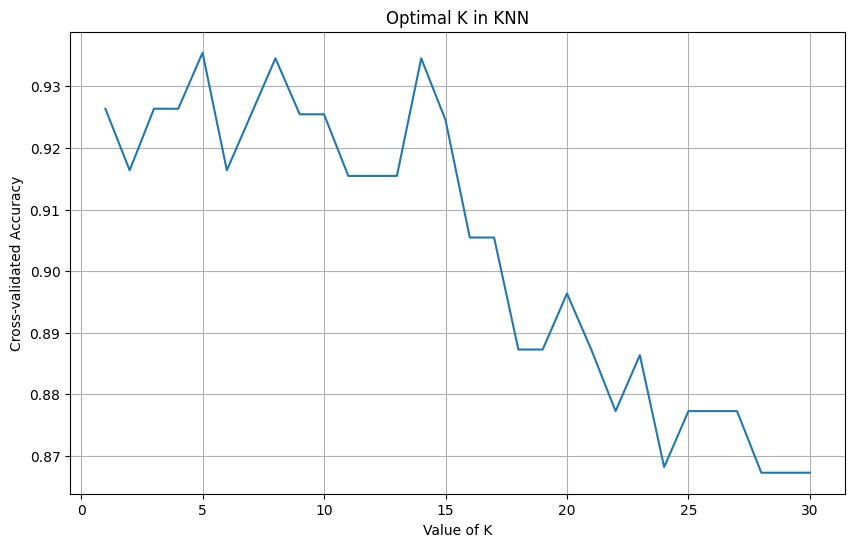

Optimal value of k: 5
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



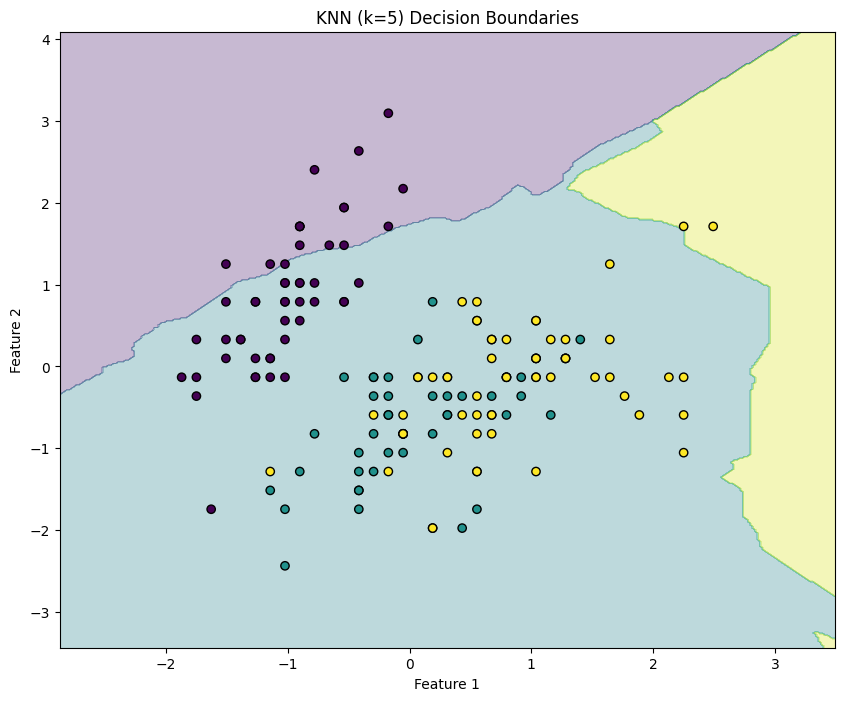

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Find optimal k
k_range = range(1, 31)
k_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot k optimization
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-validated Accuracy')
plt.title('Optimal K in KNN')
plt.grid(True)
plt.show()

# Get optimal k
optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal value of k: {optimal_k}")

# Train model with optimal k
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize decision boundaries (for first two features)
def plot_decision_boundaries(X, y, model, feature_indices=[0, 1]):
    h = .02  # step size in the mesh
    X_sub = X[:, feature_indices]
    
    # Create mesh grid
    x_min, x_max = X_sub[:, 0].min() - 1, X_sub[:, 0].max() + 1
    y_min, y_max = X_sub[:, 1].min() - 1, X_sub[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), 
                          np.zeros(xx.ravel().shape[0]), 
                          np.zeros(xx.ravel().shape[0])])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_sub[:, 0], X_sub[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(f'Feature {feature_indices[0] + 1}')
    plt.ylabel(f'Feature {feature_indices[1] + 1}')
    plt.title(f'KNN (k={optimal_k}) Decision Boundaries')
    plt.show()

plot_decision_boundaries(X, y, model)